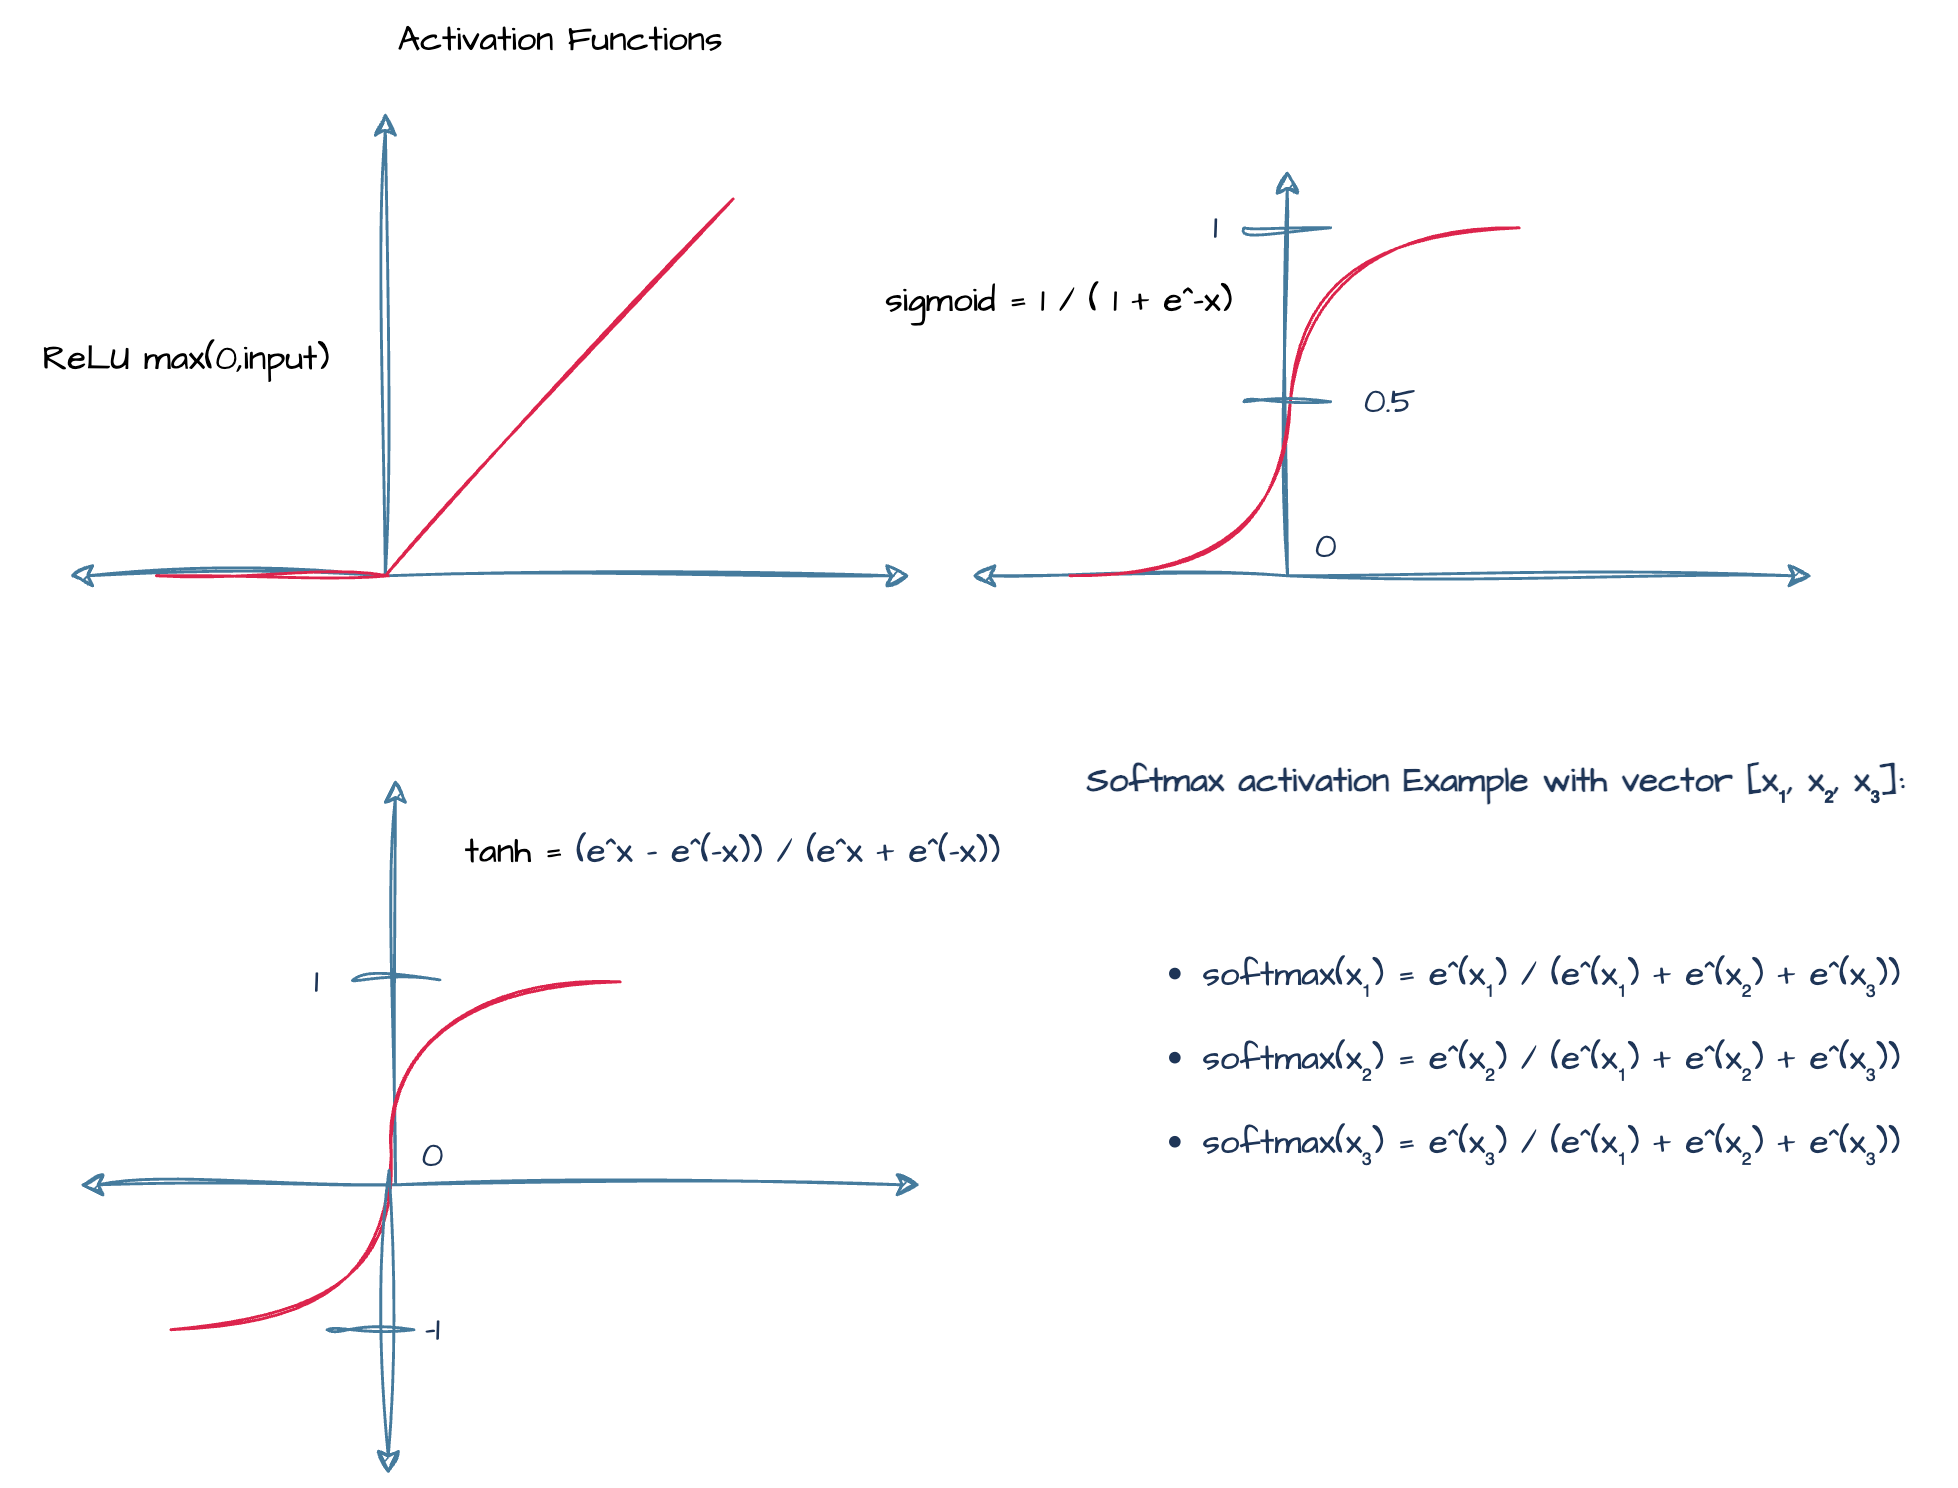

In [1]:
import numpy as np

In [5]:
class ReLU:
    @staticmethod
    def compute(inputs):
        return np.maximum(0, inputs)

print(ReLU.compute(inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]))

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [6]:
class LeakyReLU:
    @staticmethod
    def compute(inputs):
        return np.maximum(0.01 * inputs, inputs)

print(ReLU.compute(inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]))

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [13]:
class Softmax:
    @staticmethod
    def compute(inputs):
        exp = np.exp(inputs)
        return exp / np.sum(exp, axis=1, keepdims=True)

inputs = [[1, 2, 3, 2.5]]
print(Softmax.compute(inputs = inputs))

[[0.06414769 0.17437149 0.47399085 0.28748998]]


In [8]:
class Tanh:
    @staticmethod
    def compute(inputs):
        return np.tanh(inputs)

print(Tanh.compute(inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]))

[ 0.          0.96402758 -0.76159416  0.99728296 -0.99100745  0.80049902
  0.97574313 -1.        ]


In [10]:
class Sigmoid:
    @staticmethod
    def compute(inputs):
        return 1 / (1 + np.exp(-inputs))

print(Sigmoid.compute(inputs = np.array([0, 2, -1, 3.3, -2, -100])))

[5.00000000e-01 8.80797078e-01 2.68941421e-01 9.64428811e-01
 1.19202922e-01 3.72007598e-44]


### Check our dense layer with the activation functions

In [16]:
from nnfs.datasets import spiral_data
import nnfs

class DenseLayer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.random.randn(n_neurons)

    def forward(self, _inputs):
        return np.dot(_inputs, self.weights) + self.biases

nnfs.init()
X, y = spiral_data(samples=100, classes=3)
d1 = DenseLayer(2, 3)
d2 = DenseLayer(3, 3)

o1 = d1.forward(_inputs = X)
o2 = ReLU.compute(o1)
o3 = d2.forward(_inputs = o2)
o4 = Softmax.compute(o3)

print(o4[:5])

[[0.40469876 0.38626242 0.20903885]
 [0.40469873 0.38626242 0.20903888]
 [0.40469873 0.38626242 0.20903888]
 [0.40469873 0.38626242 0.20903888]
 [0.40469873 0.38626242 0.20903888]]
